# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

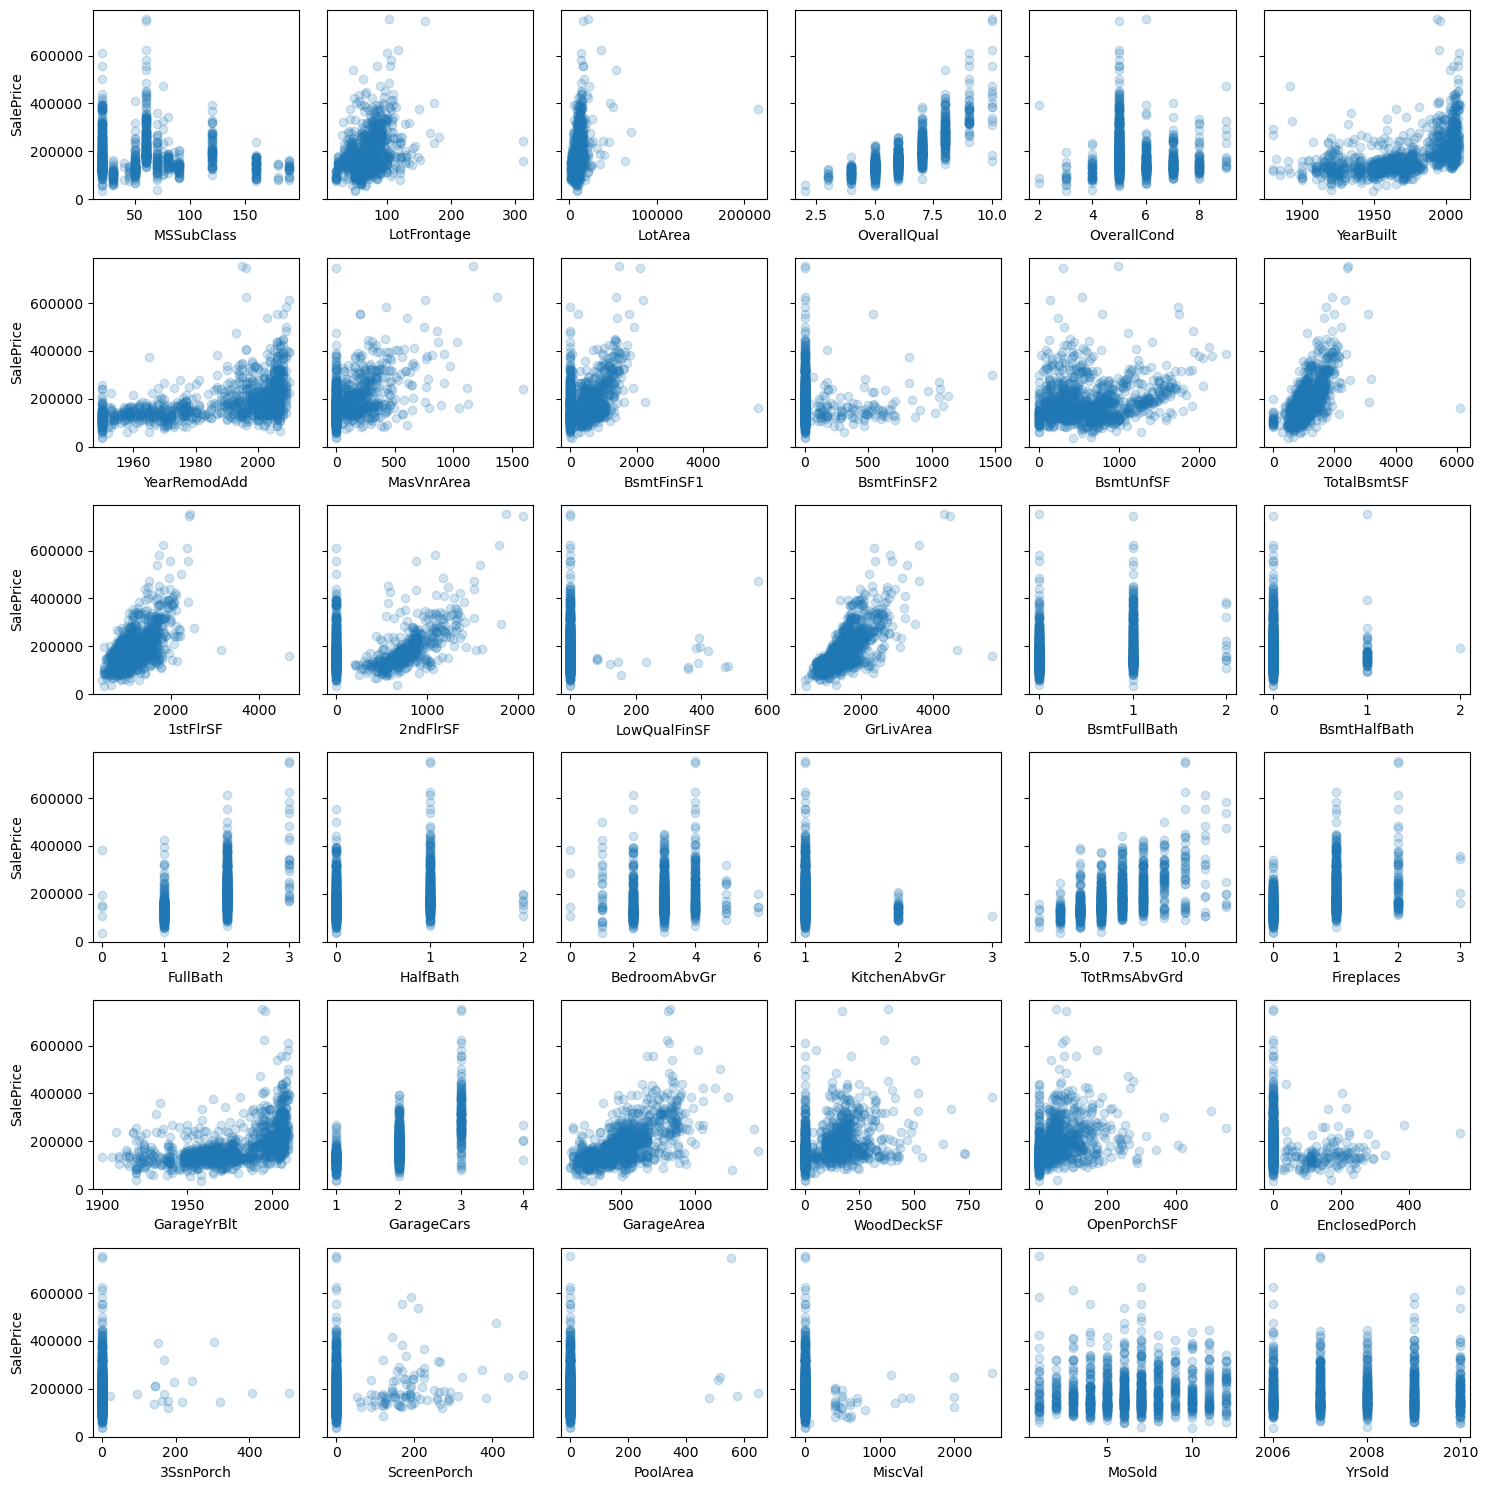

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [3]:
# Your written answer here
"""
YearBuilt, TotalBsmtSF, GarageYrBuilt are good candidates, as they resemble graph 3.

GrLivArea and GarageArea are good candidates, as they resemble graph 2.

LotFrontage and and OpenPorchSF are good candidates as they resemble graph 1.
"""

'\nYearBuilt, TotalBsmtSF, GarageYrBuilt are good candidates, as they resemble graph 3.\n\nGrLivArea and GarageArea are good candidates, as they resemble graph 2.\n\nLotFrontage and and OpenPorchSF are good candidates as they resemble graph 1.\n'

### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


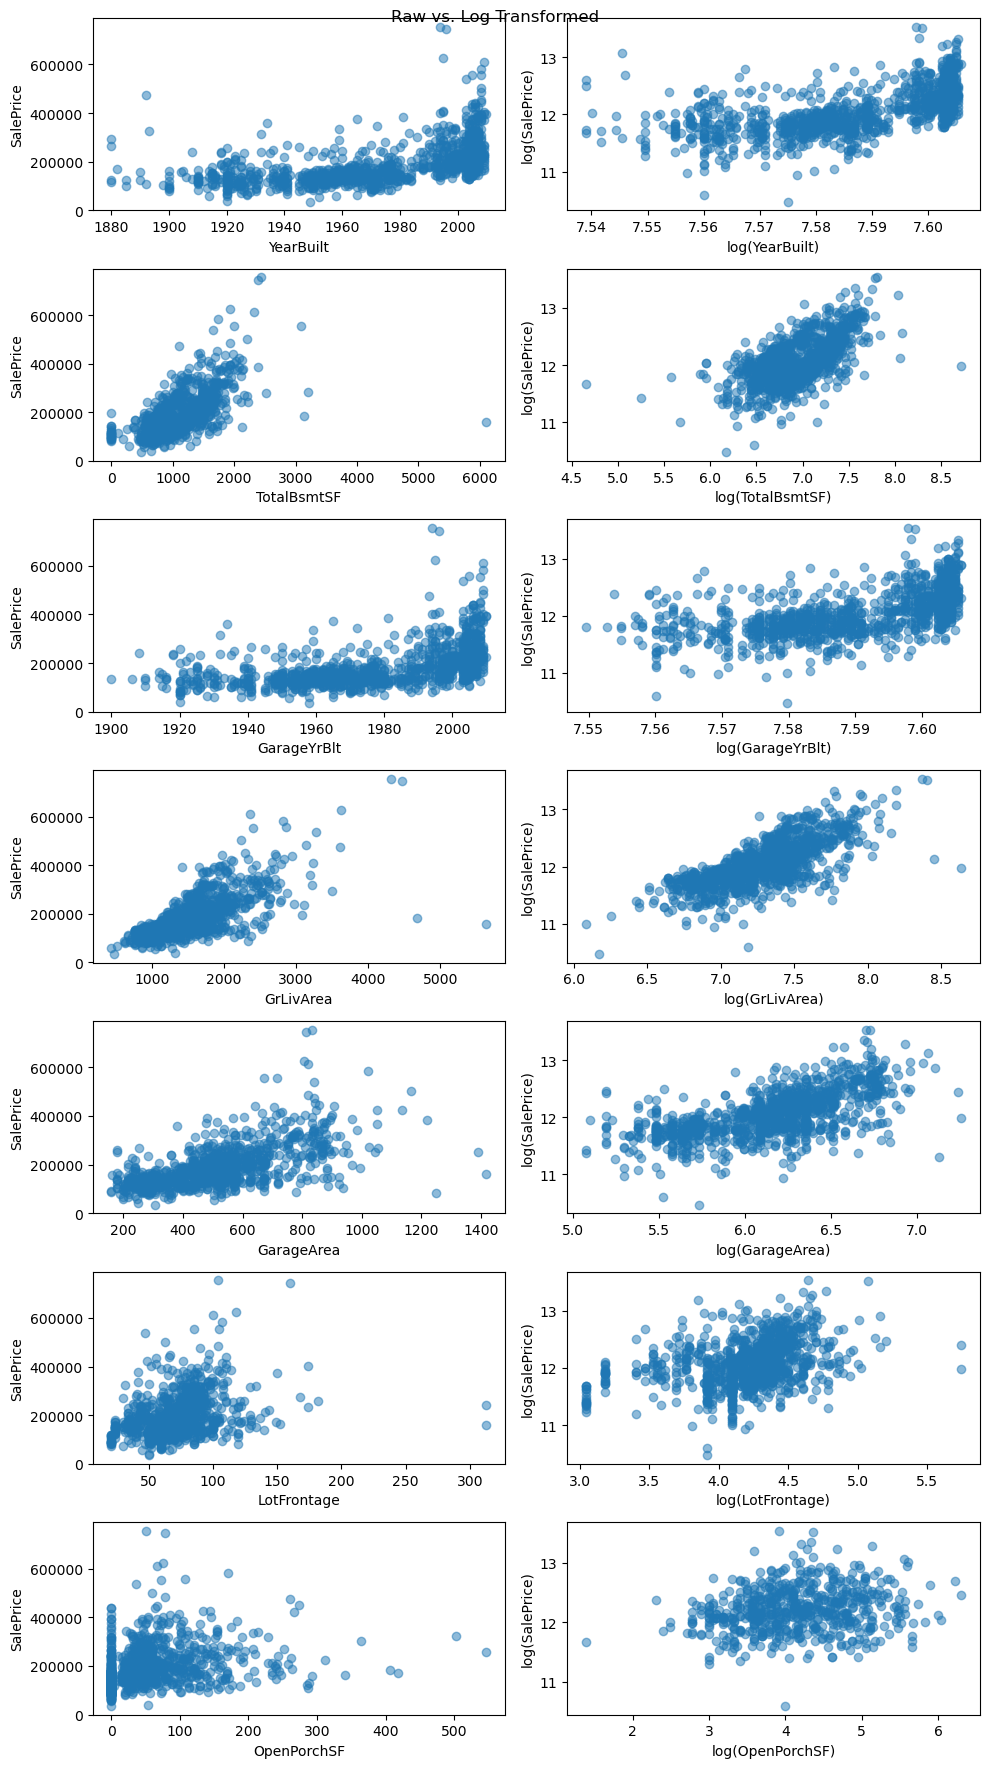

In [4]:
# Your code here

import numpy as np
candidates = ["YearBuilt", "TotalBsmtSF", "GarageYrBlt", "GrLivArea", "GarageArea", "LotFrontage", "OpenPorchSF"]

fig, axes = plt.subplots(ncols=2, nrows=len(candidates), figsize=(10,18))

for i, column in enumerate(candidates):
    # Plot raw version
    left_ax = axes[i][0]
    left_ax.scatter(ames[column], y, alpha=0.5)
    left_ax.set_xlabel(column)
    left_ax.set_ylabel("SalePrice")
    
    # Plot log transformed version
    right_ax = axes[i][1]
    right_ax.scatter(np.log(ames[column]), np.log(y), alpha=0.5)
    right_ax.set_xlabel(f"log({column})")
    right_ax.set_ylabel("log(SalePrice)")
    
fig.suptitle("Raw vs. Log Transformed")

fig.tight_layout()

Do the transformed relationships look more linear? If so, they should be included in the model.

In [5]:
"""
GrLivArea, LotFrontage, GarageArea
"""

'\nGrLivArea, LotFrontage, GarageArea\n'

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [9]:
# Your code here - prepare data for modeling
X_LotFrontage_log = X[['LotFrontage']].copy()
X_LotFrontage_log['log(LotFrontage)'] = np.log(X_LotFrontage_log['LotFrontage'])

X_LotFrontage_log[['LotFrontage', 'log(LotFrontage)']]

,LotFrontage,log(LotFrontage)
Id,,
1,65.0,4.174387
2,80.0,4.382027
3,68.0,4.219508
4,60.0,4.094345
5,84.0,4.430817
...,...,...
1456,62.0,4.127134
1457,85.0,4.442651
1458,66.0,4.189655


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [11]:
y_log = np.log(y)
y_log.name = 'log_SalePrice'

In [12]:
# Your code here - build a model
import statsmodels.api as sm
log_model = sm.OLS(y_log, sm.add_constant(X_LotFrontage_log))
log_results = log_model.fit()
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     85.25
Date:                Tue, 21 May 2024   Prob (F-statistic):           3.49e-35
Time:                        23:47:17   Log-Likelihood:                -474.35
No. Observations:                1121   AIC:                             954.7
Df Residuals:                    1118   BIC:                             969.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.7672      0.287  

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [13]:
# Your code here - evaluate the model
log_results.params["log(LotFrontage)"] * np.log(1.01)

0.002663951723221261

In [ ]:
"""
This model explained about 13% of the variance in SalePrice, which is quite low. The model is statistically significant with
a p-value well below 0.05. 

LotFrontage is not statistically significant. 

However, the model demonstrates that for every increase in 1 square foot area of Lot Frontage, we can expect an associated increase
of about 0.3% in Sale Price.

"""

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.